In [4]:
metrics = {"MAE": 0, "MAPE": 0, "MSE": 0, "MSLE": 0, "Kappa": 0, "R2": 0}
avg_metrics = [1,2,3,4,5,6]

for i, m in enumerate(metrics.keys()):
    metrics[m] = avg_metrics[i]

In [5]:
metrics

{'MAE': 1, 'MAPE': 2, 'MSE': 3, 'MSLE': 4, 'Kappa': 5, 'R2': 6}

In [1]:
from model.utils import eICU_Loader
from torch.utils.data import DataLoader

train_set = eICU_Loader("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/train")
train_loader = DataLoader(train_set, 128, shuffle=True, drop_last=True)



/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/model/utils.py:19: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  static = pd.read_csv(data_path + '/flat.csv')


In [5]:
len(train_set)

81041

In [158]:
import pandas as pd


# tst = pd.read_csv("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/train/timeseries.csv")
tsv = pd.read_csv("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/val/timeseries.csv")
# tstt = pd.read_csv("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/val/timeseries.csv")

In [162]:
len(tsv[tsv.hospitalid == 2].patient.unique())

120

In [130]:
flat = pd.read_csv("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/val/flat.csv")

/var/folders/bx/9yqb63rn12q7pnj8xkwtx0f00000gn/T/ipykernel_93505/926619797.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  flat = pd.read_csv("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/val/flat.csv")


In [134]:
flat

,patient,gender,age,admissionheight,admissionweight,hospitalid,hour,intubated,vent,dialysis,eyes,motor,verbal,meds,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,unittype_CCU-CTICU,unittype_CSICU,unittype_CTICU,unittype_Cardiac ICU,unittype_MICU,unittype_Med-Surg ICU,unittype_Neuro ICU,unittype_SICU,unitadmitsource_Acute Care/Floor,unitadmitsource_Chest Pain Center,unitadmitsource_Direct Admit,unitadmitsource_Emergency Department,unitadmitsource_Floor,unitadmitsource_ICU,unitadmitsource_ICU to SDU,unitadmitsource_Observation,unitadmitsource_Operating Room,unitadmitsource_Other,unitadmitsource_Other Hospital,unitadmitsource_Other ICU,...,physicianspeciality_endocrinology,physicianspeciality_ethics,physicianspeciality_family practice,physicianspeciality_gastroenterology,physicianspeciality_hematology,physicianspeciality_hematology/oncology,physicianspeciality_hospitalist,physicianspeciality_infectious disease,physicianspeciality_internal medicine,physicianspeciality_nephrology,physicianspeciality_neurology,physicianspeciality_nurse,physicianspeciality_nurse practitioner,physicianspeciality_obstetrics/gynecology,physicianspeciality_oncology,physicianspeciality_ophthalmology,physicianspeciality_orthopedics,physicianspeciality_other,physicianspeciality_otolaryngology,physicianspeciality_physical medicine/rehab,physicianspeciality_psychiatry,physicianspeciality_pulmonary,physicianspeciality_pulmonary/CCM,physicianspeciality_radiology,physicianspeciality_rheumatology,physicianspeciality_surgery-cardiac,physicianspeciality_surgery-critical care,physicianspeciality_surgery-general,physicianspeciality_surgery-neuro,physicianspeciality_surgery-oral,physicianspeciality_surgery-orthopedic,physicianspeciality_surgery-otolaryngology head & neck,physicianspeciality_surgery-pediatric,physicianspeciality_surgery-plastic,physicianspeciality_surgery-transplant,physicianspeciality_surgery-trauma,physicianspeciality_surgery-vascular,physicianspeciality_unknown,physicianspeciality_urology,> 89
0,3030238,1,0.943820,1.004209,0.078909,162,0.782609,1,1,0,1.0,1.000000,1.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1765223,0.0,0.988764,-0.792836,0.049843,109,0.695652,0,0,0,0.8,1.000000,1.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1327460,1,0.337079,1.004209,0.166002,82,0.565217,0,0,0,0.8,0.857143,0.833333,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3144398,0,0.516854,-0.317584,0.094439,180,0.434783,0,0,0,1.0,1.000000,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2588258,1,0.876404,0.417570,0.087303,132,0.130435,0,0,0,1.0,1.000000,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26736,2301157,1.0,0.865169,0.439848,0.080902,121,0.521739,0,1,0,1.0,1.000000,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26737,247211,1.0,0.269663,1.568570,0.144879,19,0.086957,0,0,0,1.0,1.000000,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26738,247211,1.0,0.269663,1.568570,0.14487

In [20]:
len(ts.patient.unique())

24694

In [64]:
ts

,patient,time,FiO2,bedside glucose,cvp,heartrate,noninvasivediastolic,noninvasivemean,noninvasivesystolic,respiration,sao2,st1,st2,st3,systemicdiastolic,systemicmean,systemicsystolic,temperature,FiO2_mask,bedside glucose_mask,cvp_mask,heartrate_mask,noninvasivediastolic_mask,noninvasivemean_mask,noninvasivesystolic_mask,respiration_mask,sao2_mask,st1_mask,st2_mask,st3_mask,systemicdiastolic_mask,systemicmean_mask,systemicsystolic_mask,temperature_mask,hour
0,3030238,1,0.19,0.285235,0.032773,-0.009322,0.000000,0.000000,0.000000,0.370968,0.080000,0.0000,0.000000,0.000000,0.274390,0.266355,0.265432,0.0,1.000,1.00,1.0,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.0,1.0,1.0,0.0,0.826087
1,3030238,2,0.09,0.295302,0.005252,0.019068,0.117021,0.115044,0.177914,0.236559,0.052500,0.0000,0.000000,0.000000,0.226626,0.244548,0.273148,0.0,1.000,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.0,1.0,1.0,0.0,0.869565
2,3030238,3,0.09,0.161074,0.004552,0.036017,0.127660,0.141593,0.288344,0.147849,0.062500,0.0000,0.000000,0.000000,0.225610,0.260125,0.287551,0.0,0.750,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.0,1.0,1.0,0.0,0.913043
3,3030238,4,0.09,0.161074,0.000350,0.024718,0.117021,0.150442,0.282209,0.172043,0.045000,0.0000,0.000000,0.000000,0.205285,0.248442,0.268519,0.0,0.375,0.75,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.0,1.0,1.0,0.0,0.956522
4,3030238,5,-0.17,0.053691,0.011204,0.046610,0.319149,0.309735,0.386503,0.147849,0.038333,0.0000,0.000000,0.000000,0.293699,0.324766,0.318930,0.0,1.000,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.0,1.0,1.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641683,2301157,20,0.19,0.000000,0.000000,-0.036723,0.095745,0.097345,0.171779,0.271505,0.073333,-1.0250,-0.825980,0.151562,0.000000,0.000000,0.000000,0.0,1.000,0.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.347826
641684,2301157,21,0.19,0.000000,0.000000,-0.043079,0.063830,0.097345,0.214724,0.276882,0.053333,-0.8875,-0.431373,0.484896,0.000000,0.000000,0.000000,0.0,0.750,0.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.391304
641685,2301157,22,0.19,0.000000,0.000000,-0.023305,0.063830,0.088496,0.214724,0.239247,0.069167,-0.7625,-0.519608,0.292188,0.000000,0.000000,0.000000,0.0,1.000,0.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.434783
641686,2301157,23,0.19,0.000000,0.000000,-0.030367,0.117021,0.132743,0.233129,0.233871,0.068333,-0.9125,-0.497549,0.401562,0.000000,0.000000,0.000000,0.0,1.000,0.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.478261


In [69]:
l = list(range(len(ts.patient.unique())))

In [55]:
for i, patient in enumerate(ts.patient.unique()):
    ts.patient[ts.patient == patient ] = l[i]


/var/folders/bx/9yqb63rn12q7pnj8xkwtx0f00000gn/T/ipykernel_93505/3329299950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.patient[ts.patient == patient ] = l[i]


In [53]:
ts.patient[ts.patient == 3030238 ] = l[0]

/var/folders/bx/9yqb63rn12q7pnj8xkwtx0f00000gn/T/ipykernel_93505/3502406617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.patient[ts.patient == 3030238 ] = l[0]


In [65]:
l = list(range(len(ts.patient.unique())))
d = dict(zip(ts.patient.unique(), l))
ts['patient'] = ts['patient'].map(d)

In [66]:
ts['patient'] = ts['patient'].map(d)

In [72]:
l = list(range(len(ts.patient.unique())))
d = dict(zip(ts.patient.unique(), l))

for data in [ts, ts1]:
    data['patient'] = data['patient'].map(d)


In [129]:
len(tstt.hospitalid.unique())

189

In [121]:
len(tsv.hospitalid.unique())

187

In [91]:
df = pd.DataFrame((tsv.groupby('hospitalid')['patient'].count()/24).sort_values())

In [125]:
tst[tst.hospitalid == 100].patient.unique()

array([1605243, 1685181, 1624358])

In [135]:
data_cache_dir = "/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/"
data_cache_dir - 'eICU_Data/'

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [100]:
set(tst.hospitalid.unique()).difference(set(tsv.hospitalid.unique()))

{19, 100}

In [136]:
for i, val in enumerate([0,1,2,3]):
    print('ok')
print(i)

ok
ok
ok
ok
3


In [150]:
import yaml
#this code takes into consideration the nested nature of the yaml file

def load_config(yaml_path):
    args = load_yaml_config(yaml_path)
    args = obj(args)
    return args

def load_yaml_config(yaml_path):
    """Helper function to load a yaml config file"""
    with open(yaml_path, "r") as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            raise ValueError("Yaml error - check yaml file")

class obj(object):
    def __init__(self, d):
        for k, v in d.items():
            if isinstance(k, (list, tuple)):
                setattr(self, k, [obj(x) if isinstance(x, dict) else x for x in v])
            else:
                setattr(self, k, obj(v) if isinstance(v, dict) else v)

In [151]:
args = load_config("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/distributed_training/config.yml")

In [153]:
args.train_args.epochs

2

In [ ]:
from fedml.arguments import add_args, Arguments

cf_args = add_args()
args = Arguments(cf_args)


In [154]:
import os, glob
max(glob.glob(os.path.join("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/distributed_training/", '*/')), key=os.path.getmtime)

'/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/distributed_training/training_20230114_103010/'

In [156]:
import pandas as pd
test_metrics_df = pd.DataFrame([[2.75478332990952, 0.6517291226769052, 24.957664688860625, 0.899083472680004, -9265.864699279273]], columns = ['MAE', 'MAPE', 'MSE', 'MSLE', 'R_sq'])

In [157]:
test_metrics_df

,MAE,MAPE,MSE,MSLE,R_sq
0,2.754783,0.651729,24.957665,0.899083,-9265.864699


In [216]:
import joblib
train = joblib.load('/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/hosp_dicts/local_train')

In [221]:
a = 1
b = 2
t = (a, b)
t = t + (5,)

In [222]:
t

(1, 2, 5)

In [218]:
for key, loader in train.items():
    print(key,loader)

0 <torch.utils.data.dataloader.DataLoader object at 0x7f927973a440>
1 <torch.utils.data.dataloader.DataLoader object at 0x7f92797388b0>
2 <torch.utils.data.dataloader.DataLoader object at 0x7f92797380d0>
3 <torch.utils.data.dataloader.DataLoader object at 0x7f9279738400>
4 <torch.utils.data.dataloader.DataLoader object at 0x7f9279737a90>
5 <torch.utils.data.dataloader.DataLoader object at 0x7f92798a4400>
6 <torch.utils.data.dataloader.DataLoader object at 0x7f92798a4a30>
7 <torch.utils.data.dataloader.DataLoader object at 0x7f92798a5060>
8 <torch.utils.data.dataloader.DataLoader object at 0x7f92798a5690>
9 <torch.utils.data.dataloader.DataLoader object at 0x7f92798a5cc0>


In [212]:
import numpy as np
#Code for kappa score from E. Rocheteau
class CustomBins:
    inf = 1e18
    bins = [(-inf, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 14), (14, +inf)]
    nbins = len(bins)

def get_bin_custom(x, nbins, one_hot=True):
    for i in range(nbins):
        a = CustomBins.bins[i][0]
        b = CustomBins.bins[i][1]
        if a <= x < b:
            if one_hot:
                onehot = np.zeros((CustomBins.nbins,))
                onehot[i] = 1
                return onehot
            return i
    return None

In [236]:
import numpy as np
loader = train[0]
out = np.ndarray(0)

for i in range(len(loader.dataset)):
    out = np.append(out, loader.dataset[i][1])

out_bins = sum([get_bin_custom(x, CustomBins.nbins) for x in out])


In [237]:
out_bins

array([ 0., 89., 34.,  7., 11.,  5.,  2.,  1.,  1.,  0.])

In [226]:
sum(out_bins/150 - out_bins/150)

#difference closer to 0 is more valuable

0.0

In [235]:
0.04 * 0.8

0.032

In [204]:
pd.DataFrame(out_bins, columns=['bins']).bins.value_counts()

1    89
2    34
4    11
3     7
5     5
6     2
8     1
7     1
Name: bins, dtype: int64

In [ ]:
# global dist: [0.         0.44455446 0.22118812 0.11148515 0.0639604  0.04118812 0.02455446 0.02178218 0.04792079 0.02336634]

#  local dist: [0.         0.59333333 0.22666667 0.04666667 0.07333333 0.03333333 0.01333333 0.00666667 0.00666667 0.        ]
# local div: 2.0816681711721685e-17

#  local dist: [0.         0.42096927 0.2245803  0.11941717 0.06145074 0.04529617 0.024707   0.02312322 0.05384859 0.02660754]
# local div: 3.122502256758253e-17

#  local dist: [0.         0.52162162 0.2        0.0972973  0.05675676 0.01621622 0.01621622 0.01891892 0.04594595 0.02702703]
# local div: 1.3877787807814457e-17

#  local dist: [0.         0.48113208 0.22641509 0.09433962 0.01886792 0.05660377 0.03773585 0.04716981 0.03773585 0.        ]
# local div: 0.0

#  local dist: [0.         0.39243499 0.22458629 0.12529551 0.07092199 0.05200946 0.03309693 0.0141844  0.05200946 0.03546099]
# local div: 2.0816681711721685e-17

#  local dist: [0.         0.53974895 0.20502092 0.07531381 0.08368201 0.0209205 0.0209205  0.0251046  0.0167364  0.0125523 ]
# local div: 1.214306433183765e-17

#  local dist: [0.         0.48591549 0.16197183 0.09859155 0.07042254 0.04225352 0.02816901 0.04225352 0.04225352 0.02816901]
# local div: 6.938893903907228e-18

#  local dist: [0.         0.36206897 0.26724138 0.12068966 0.10344828 0.02586207 0.04310345 0.02586207 0.04310345 0.00862069]
# local div: 2.42861286636753e-17

#  local dist: [0.         0.46987952 0.20481928 0.09638554 0.08433735 0.05421687 0.02409639 0.01204819 0.04819277 0.0060241 ]
# local div: 3.469446951953614e-18

#  local dist: [0.         0.54696133 0.24309392 0.09944751 0.04972376 0.01657459 0.01104972 0.00552486 0.02762431 0.        ]
# local div: 2.0816681711721685e-17
# 0 150 2.0816681711721685e-17
# 1 3157 3.122502256758253e-17
# 2 370 1.3877787807814457e-17
# 3 106 0.0
# 4 423 2.0816681711721685e-17
# 5 239 1.214306433183765e-17
# 6 142 6.938893903907228e-18
# 7 116 2.42861286636753e-17
# 8 166 3.469446951953614e-18
# 9 181 2.0816681711721685e-17
# The sorted dict
# {1: 0.008898825966347907, 4: 0.02431083191631577, 2: 0.025993762245501824, 5: 0.03234231136765755, 9: 0.037164707312358325, 8: 0.03880752628531664, 0: 0.04082482904638632, 6: 0.04195906791483446, 7: 0.04642383454426298, 3: 0.04856429311786321}
# {1: 0.00889882596634792, 4: 0.024310831916315778, 2: 0.02599376224550183, 5: 0.032342311367657556, 9: 0.03716470731235834, 8: 0.03880752628531664, 0: 0.040824829046386325, 6: 0.04195906791483446, 7: 0.046423834544262986, 3: 0.04856429311786321}

In [242]:
abs(sum(np.array([0.,       0.44455446, 0.22118812, 0.11148515, 0.0639604,  0.04118812, 0.02455446, 0.02178218, 0.04792079, 0.02336634]) - np.array([0.,         0.48113208, 0.22641509, 0.09433962, 0.01886792, 0.05660377, 0.03773585, 0.04716981, 0.03773585, 0.        ])))

2.9999999949514855e-08

In [248]:
0.1*0.1

0.010000000000000002

In [249]:
2.0816681711721685e-17*0.01

2.0816681711721684e-19

In [251]:
0.5*(150**-0.5)

0.040824829046386304

In [267]:
(0.5*2.0816681711721685e-17)+(0.9*(150**-0.5))

0.07348469228349537

In [252]:
2.0816681711721684e-19+0.040824829046386304

0.040824829046386304

In [270]:
d = {1: 0.008898825966347891, 4: 0.02431083191631576, 2: 0.025993762245501817, 5: 0.03234231136765754, 9: 0.03716470731235832, 8: 0.03880752628531664, 0: 0.040824829046386304, 6: 0.041959067914834454, 7: 0.046423834544262965, 3: 0.04856429311786321}

In [279]:
s = 0
sc = 0.03452899897168449
for key, value in d.items():
    s += value
    if s >= tot_rep*args.representation_perc:
        print(key)
        break

2


In [284]:
round(17*0.1)

2

In [280]:
c = []
c.append(1)
c

[1]

In [272]:
l = [0.008898825966347891,
0.01541200594996787,
0.001682930329186056,
0.006348549122155725,
0.004822395944700776,
0.0016428189729583223,
0.0020173027610696642,
0.0011342388684481494,
0.004464766629428511,
0.0021404585736002416]

In [275]:
sum(l)

0.04856429311786321

In [274]:
for i, val in enumerate(l):
    val1 = l[i+1]
    gain = val1 - val 
    print(gain)


0.006513179983619978
-0.013729075620781813
0.004665618792969669
-0.0015261531774549489
-0.003179576971742454
0.0003744837881113419
-0.0008830638926215148
0.003330527760980362
-0.0023243080558282697


IndexError: list index out of range

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

t_labs = pd.read_csv("/Users/vscheltjens/Documents/PhD/Projects/eicu-cl-req/eICU_Data/train/labels.csv")

def gen_plots(df):
    x = df['actualiculos']
    
    sns.set_palette("pastel")
    sns.set_style('white')


    tex_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10
    }

    # plt.rcParams.update(tex_fonts)

    fig, ax = plt.subplots(figsize=(3,3))

    for (d, c) in [(x, 'purple')]:
        sns.histplot(d,bins=range(0, 300, 1), fill=True, ax=ax, color=c, alpha=0.3)

    ax.set_xlim([0, 50])
    ax.set_xlabel('Days')
    ax.set_ylabel(None)
    ax.set(yticklabels=[])
    ax.legend(['ICU LoS'])
    # sns.despine()

    plt.plot()

    # if data == 'MIMIC':
    #     fig.savefig('./mimic.pdf')
    # elif data == 'AUMC':
    #     fig.savefig('./aumc.pdf')
    return


In [8]:
gen_plots(t_labs)

Error in callback <function _draw_all_if_interactive at 0x7fdab925ab00> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 300x300 with 1 Axes>

<AxesSubplot: >

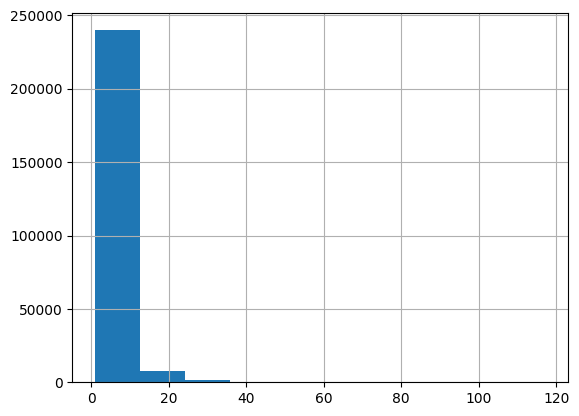

In [6]:
t_labs.actualiculos.hist()